# Heart Stroke Prediction

### Life cycle of Machine Learning Project
* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory Data Analysis
* Data Preprocessing
* Model Training
* Choose Best Model

## 1. Problem Statement
* In the proposed model, heart stroke prediction is performed on a dataset collected from Kaggle. The model predicts the chances of a person will have heart stroke based on symptoms like age, gender, average glucose level, smoking status, body mass index, work type and residence type.

## 2. Import Data

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

**Show Top 5 Records**

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**Shape of the dataset**

In [6]:
df.shape

(5110, 12)

**Summary of the dataset**

In [7]:
# display summary statistics for the dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Statistical Inferences
* Median age of population is 43 years.
* 25% of the population is aged below 25.
* Another 25% is aged above 60 and remaining in between these ages.
* Average glucose levels of the population is 106.
* About 9.7% and 5.4% of population suffers from hypertension and heart disease respectively.
* People with higher BMI (BMI > 45) are less represented. This can affect our machine learning models significantly.

**Check the data types of the dataset**

In [8]:
# check null values and dtypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 3. Exploring Data

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 7 numerical features: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


#### Feature Information

The dataset consists of total 12 attributes. The complete description of the attributes used in the proposed work is given below:

* **id:** This attribute means person's id. It's numerical data.
* **age:** This attribute means a person's age. It's numerical data.
* **gender:** This attribute means a person's gender. It's categorical data.
* **hypertension:** This attribute menas that this person is hypertensive or not. It's numerical data.
* **work_type:** This attribute represents the person work scenario. It's categorical data.
* **Residence_type:** This attribute represents the person living scenario. It's categorical data.
* **heart_disease:** This attribute means whether this person has a heart disease or not. It's numerical data.
* **avg_glucose_level:** This attribute means what was the level of a person's glucose condition. It's numerical data.
* **bmi:** This attribute means body mass index of a person. It's numerical data.
* **ever_married:** This attribute represents a person's marriage status. It's categorical data.
* **smoking_status:** This attribute means a person's smoking condition. It's categorical data.
* **stroke:** This attribute means a person previously has a stroke or not.

In [10]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("---------------------------------")

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
---------------------------------
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
---------------------------------
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
---------------------------------
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
---------------------------------
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
---------------------------------


### Univariate Analysis

* The term univariate analysis refers to the analysis of one variable at a time. The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### Numerical Features

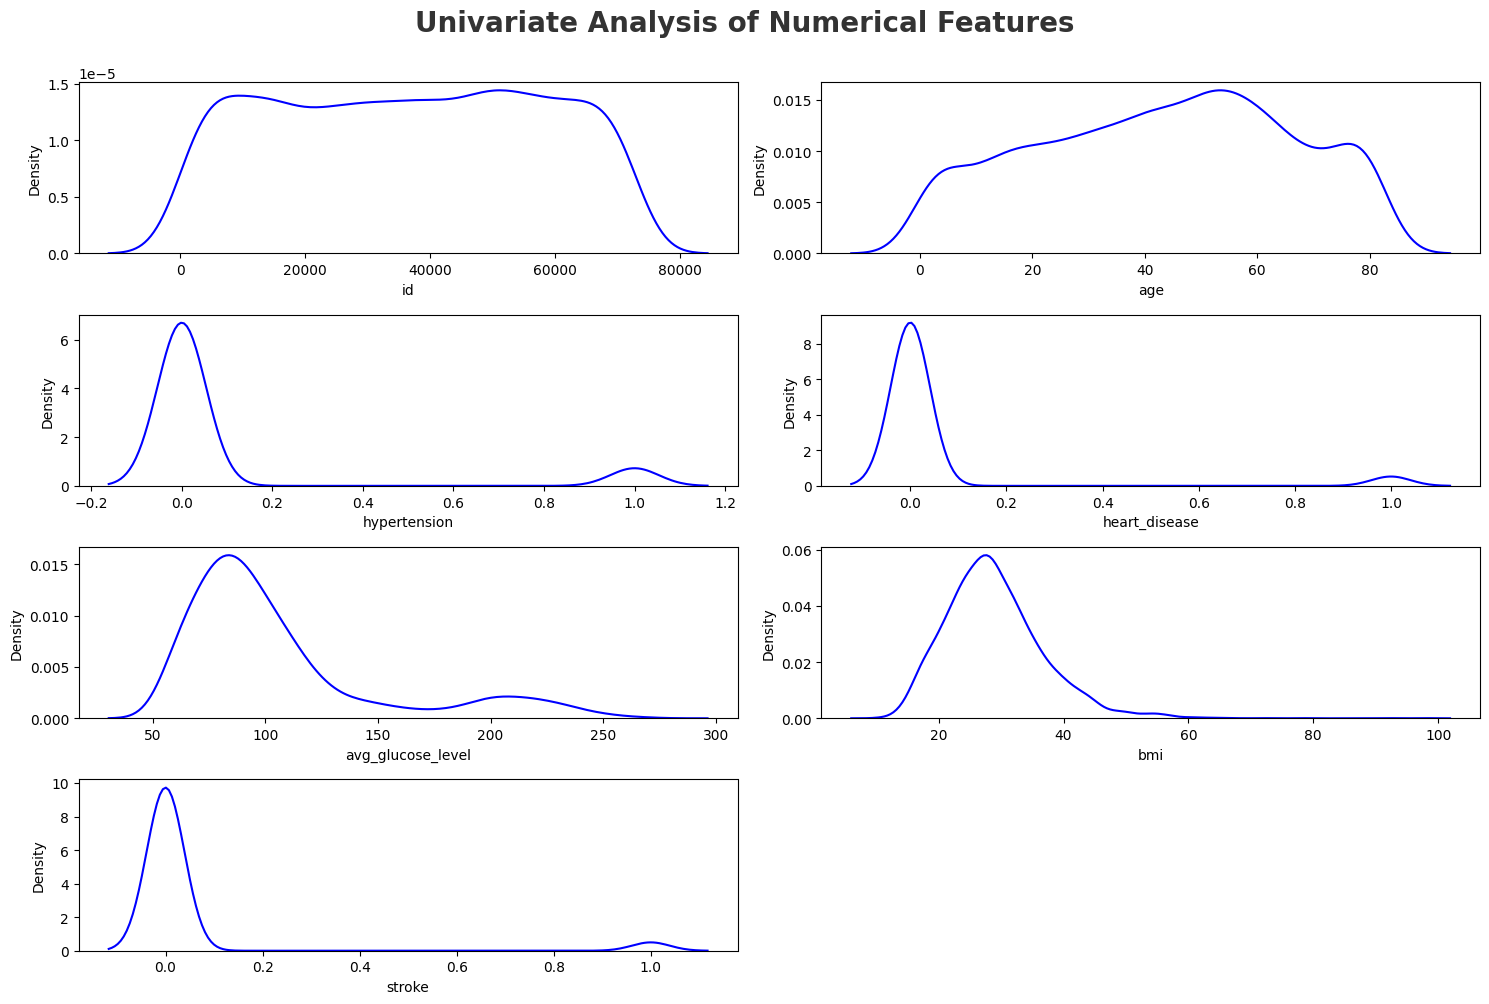

In [15]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# save plot
plt.savefig("images/univariate_num.png")

**Observations:**

* `age`, `bmi`, `avg_glucose_level` are the only continuous features.
* `id` is of unique values, which is of no importance.
* `hypertension`, `heart_disease`, `stroke` are categorical features but they are in encoded form.
* The density plot of `age` shows a bimodal distribution with peaks around the age range of 50-60, suggesting a higher concentration of individuals in these age groups.
* The density of `hypertension` is heavily skewed towards 0, indicating that the majority of individuals do not have hypertension. A small peak is observed at 1, representing individuals with hypertension.
* Similar to hypertension, the density of `heart_disease` is skewed towards 0, indicating that most individuals do not have heart disease. A minor peak at 1 indicates the presence of some individuals with heart disease.
* The plot of `avg_glucose_level` shows a right-skewed distribution with a peak around 80-100. This indicates that most individuals have average glucose levels within this range, but there are outliers with higher glucose levels.
* The `bmi` density plot is also right-skewed, with a peak around 25-30, suggesting that most individuals have a BMI in the normal to overweight range. There are fewer individuals with very high or very low BMI values.
* The density of `stroke` is heavily skewed towards 0, indicating that the majority of individuals have not experienced a stroke. A very small peak at 1 indicates a few individuals who have had a stroke.

#### Categorical Features

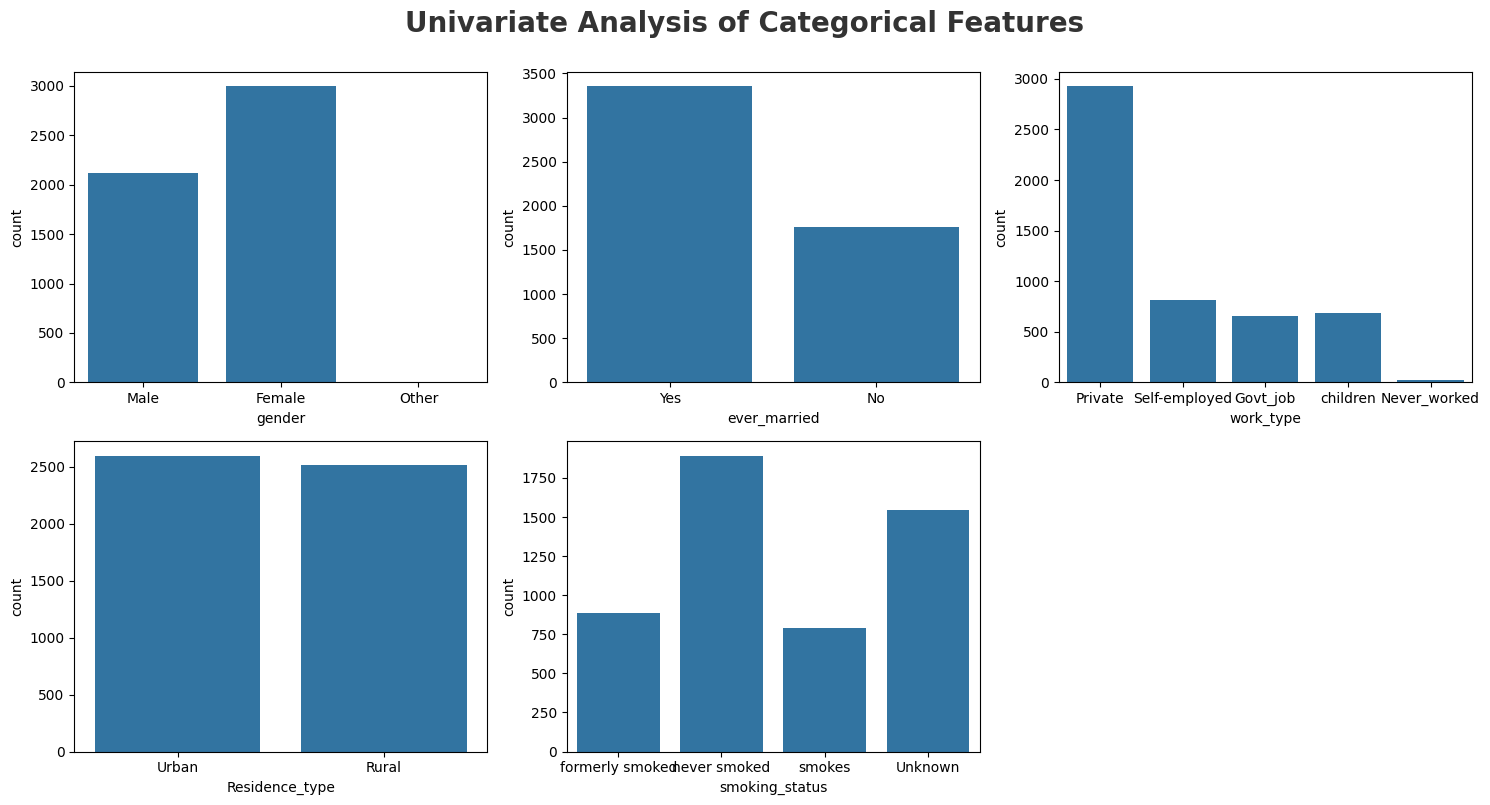

In [16]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
plt.savefig("images/univariate_cat.png")

**Observations:**

* The majority of the individuals are Female, followed by Male, with very few individuals categorized as Other.
* A larger number of individuals have been married (Yes) compared to those who have never been married (No).
* The majority of individuals work in the Private sector. This is followed by Self-employed and Govt_job, with children and Never_worked having the smallest counts.
* The counts for Urban and Rural residence types are nearly equal, indicating a balanced distribution between these two categories.
* The plot for `smoking_status` shows the highest count is for individuals who have never smoked. This is followed by Unknown smoking status, formerly smoked, and currently smokes. The Unknown category is significant, suggesting a large amount of missing or undisclosed smoking status data.

### Multivariate Analysis

* The term multivariate analysis refers to the analysis of more than one variable.

In [17]:
discrete_features = [feature for feature in numeric_features if (len(df[feature].unique()) <= 25 and len(df[feature].unique()) > 5)]

continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <= 5]

print("We have {} discrete features: {}".format(len(discrete_features), discrete_features))
print("\nWe have {} continuous features: {}".format(len(continuous_features), continuous_features))
print("\nWe have {} encoded categorical features: {}".format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features: []

We have 4 continuous features: ['id', 'age', 'avg_glucose_level', 'bmi']

We have 3 encoded categorical features: ['hypertension', 'heart_disease', 'stroke']


* There are no discrete numerical features.

In [18]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


### Check Multicollinearity in Numerical features

In [19]:
df[(list(df[continuous_features])[1:])].corr() # without considering "id"

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


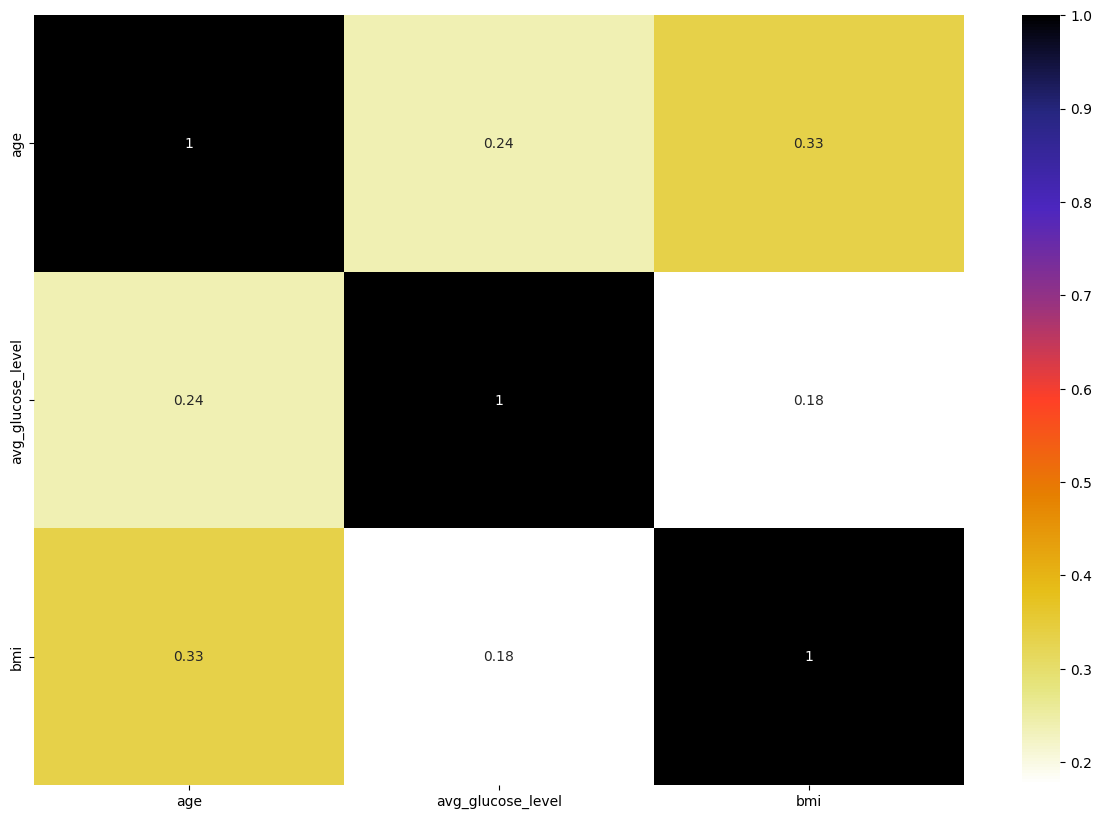

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(15, 10))
cont_features = continuous_features.copy()
cont_features.remove("id")
sns.heatmap(df[cont_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

# save heatmap
plt.savefig("images/multicollinearity_num.png")

**Observation:**

* There is no multicollinearity present in the dataset since their is no correlation between the features.

### Check Multicollinearity for Categorical features

* A chi-squared test is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.
* A chi-square statistic is one way to show a relationship between two categorical variables.
* Here we test correlation of Categorical columns with Target column i.e., `stroke`

`Null Hypothesis (H0) :` The feature is independent of target column (No correlation).

`Alternative Hypothesis (H1) :` The feature and target column are not independent (Correlated).

In [22]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df["stroke"], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ["Column", "Hypothesis Result"]
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,ever_married,Reject Null Hypothesis
2,work_type,Reject Null Hypothesis
3,Residence_type,Fail to Reject Null Hypothesis
4,smoking_status,Reject Null Hypothesis
5,hypertension,Reject Null Hypothesis
6,heart_disease,Reject Null Hypothesis
7,stroke,Reject Null Hypothesis


Let's deal with the gender column which has a category `other` with only one observation and check the hypothesis again.

In [23]:
df_new = df.copy()
df_new.gender = np.where(df.gender == "Other", "Female", df.gender) # changing the gender "Other" to "Female"

In [24]:
chi2_contingency(pd.crosstab(df_new["stroke"], df_new["gender"]))

Chi2ContingencyResult(statistic=np.float64(0.34312923759376157), pvalue=np.float64(0.5580285118426893), dof=1, expected_freq=array([[2849.05968689, 2011.94031311],
       [ 145.94031311,  103.05968689]]))

Even after the substitution, the difference is not significant and we fail to reject the null hypothesis.

**Observation:**

* `gender` and `Residence_type` are independent of the target column (Not-correlated with target).

### Check Null Values

In [25]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

`bmi` column is having 201 missing values, which we will handle.

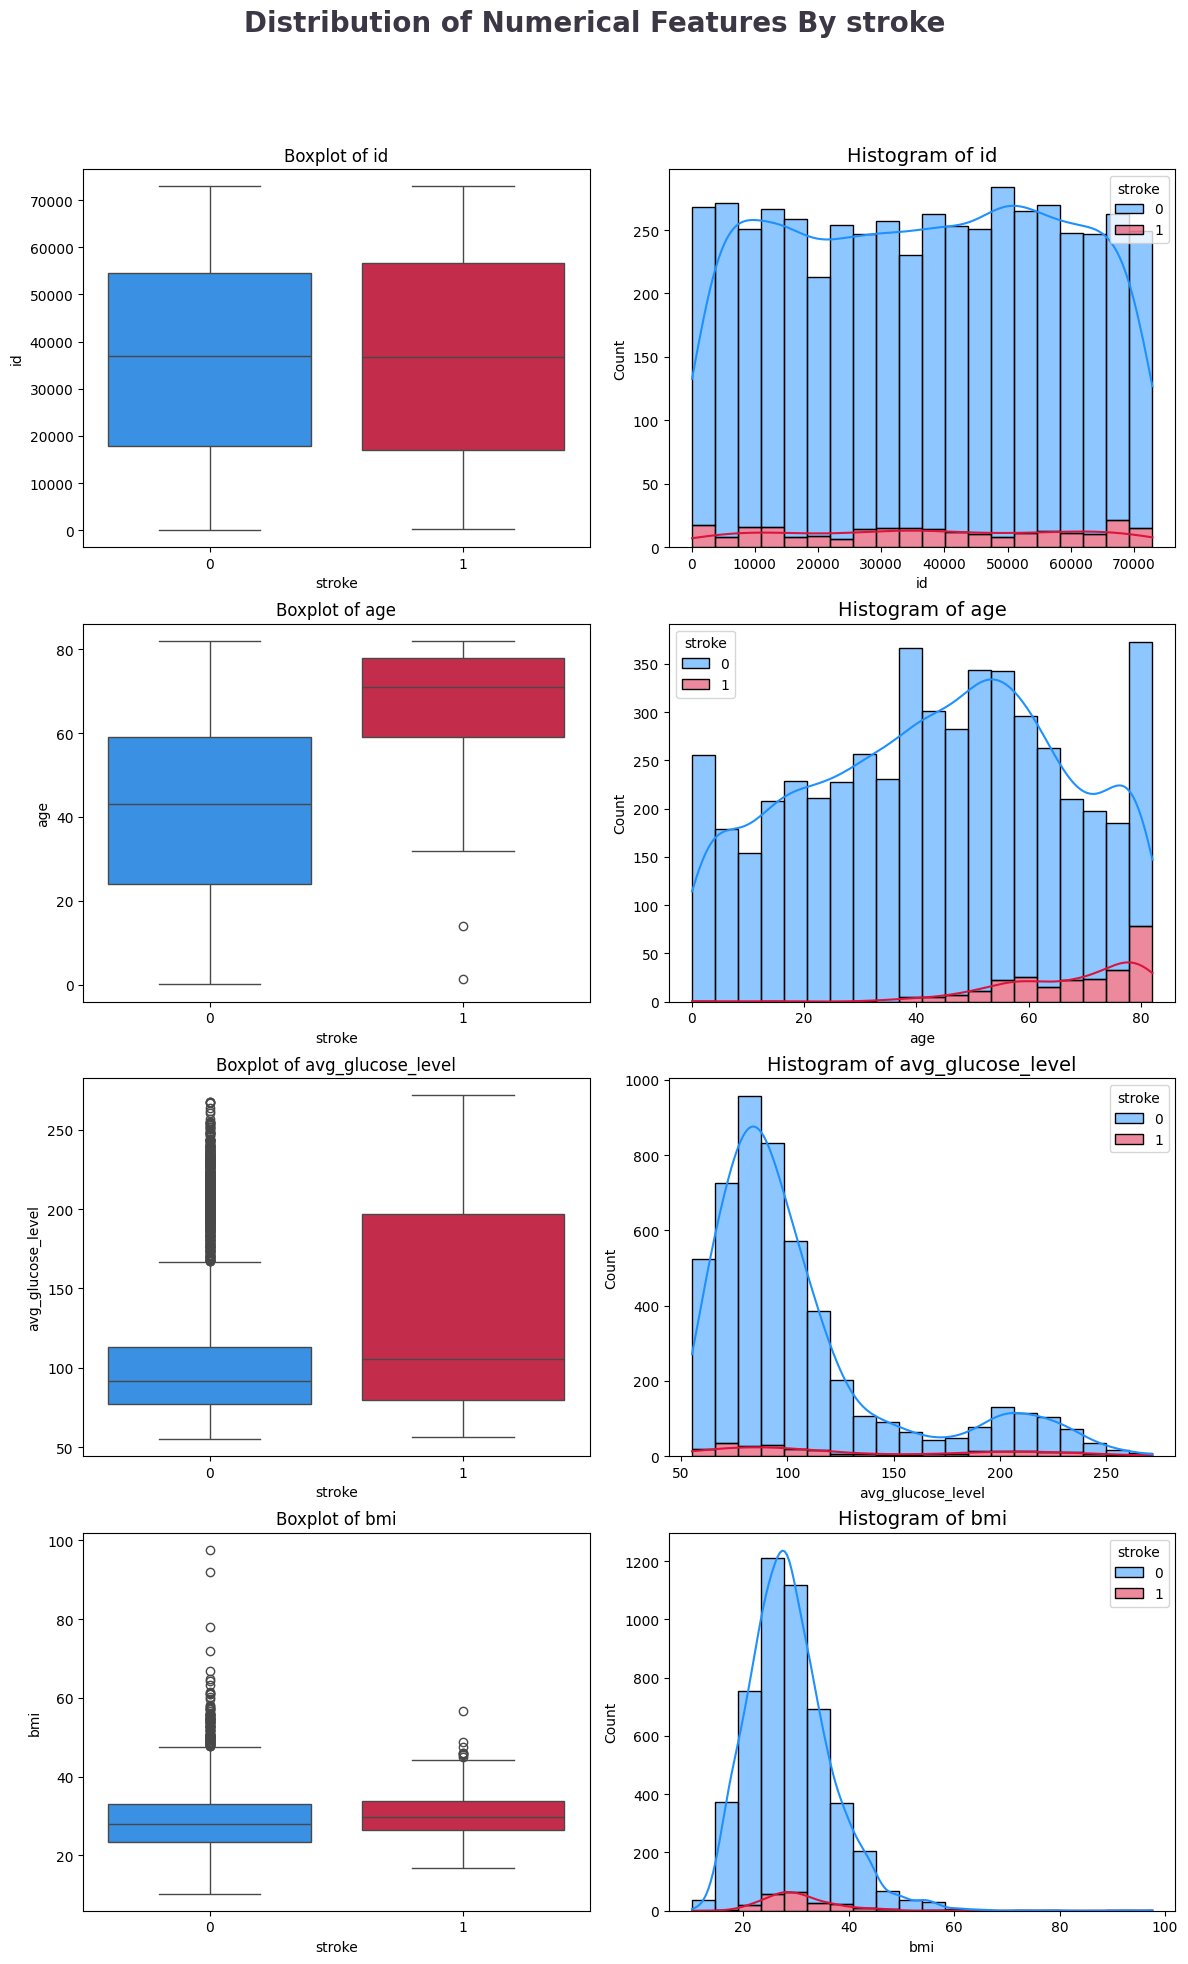

In [26]:
clr1 = ["#1E90FF", "#DC143C"]
fig, ax = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Distribution of Numerical Features By stroke", color="#3C3744",
             fontsize=20, fontweight="bold", ha="center")
for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x="stroke", y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of {col}", fontsize=12)
    sns.histplot(data=df, x=col, hue="stroke", bins=20, kde=True,
                 multiple="stack", palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f"Histogram of {col}", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

# save plot
plt.savefig("images/multivariate_num.png")

**Observations:**

* The `id` feature has unique values. It can be ignored as a feature.
* The boxplot of `age` feature shows that individuals who experienced a stroke tend to be older. The median age for those with stroke is higher compared to those without. Additionally, the interquartile range for the stroke group is more compact, indicating that stroke occurrences are concentrated in older age groups. The histogram shows that stroke occurrences are more frequent in older age groups, with a noticeable increase in count for individuals above 60.
* The boxplot of `avg_glucose_level` feature shows that the average glucose levels are higher in individuals who had a stroke. The stroke group has a higher median and a broader interquartile range, with more outliers present in the no-stroke group. The histogram illustrates that individuals with higher average glucose levels have a higher incidence of stroke. The distribution for the no-stroke group peaks around lower glucose levels.
* The boxplot of `bmi` feature shows that the BMI values are slightly higher for individuals who had a stroke, with a higher median compared to those without. The interquartile range and overall spread are similar between both groups, but there are more outliers in the no-stroke group. The histogram indicates that higher BMI values are slightly more common in the stroke group, but the overall distribution is quite similar for both groups.

**Key takeaways:**

* Higher `age` group people have higher chance of heart stroke.
* Higher the `avg_glucose_level`, higher will be the chance of stroke.
* `bmi` has not much of influence on the heart stroke, may be becase of missing values.

### Initial Analysis

* There are missing values in `bmi` feature.
* `id` feature can be dropped, because each row has unique values.
* `Resident_type` and `gender` columns are not correlated with `stroke` (target column).
* `stroke` column is the target to predict.

## 4. Visualization

### 4.1 Visualize the Target Column

In [27]:
df1 = df.copy()
df1['stroke'] = np.where((df.stroke == 1), 'Stroke', 'Not-Stroke')

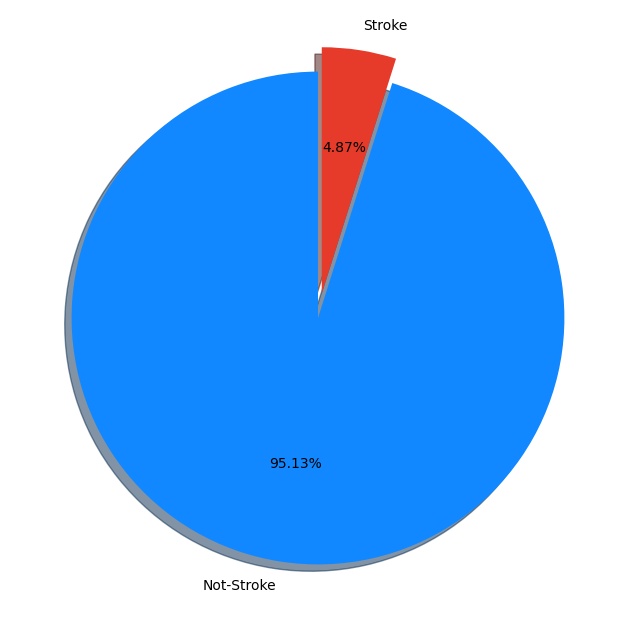

<Figure size 640x480 with 0 Axes>

In [38]:
percentage = df1.stroke.value_counts(normalize=True)*100
label = ["Not-Stroke", "Stroke"]

# Plot PieChart with Plotly library
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ["#1188ff", "#e63a2a"]
ax.pie(percentage,
       labels=label,
       startangle=90,
       autopct='%1.2f%%',
       explode=explode,
       shadow=True,
       colors=colors)
plt.show()

# save pie chart
plt.savefig("images/piechart_target_var.png")

**Observations:**

* The chart shows that a very small proportion of the target variable is composed of individuals who have experienced a stroke (represented by the red slice). Specifically, only 4.87% of the individuals have had a stroke.
* The vast majority of the target variable consists of individuals who have not experienced a stroke (represented by the blue slice). This accounts for 95.13% of the individuals.

**Takeaway:**

* The target variable is highly imbalanced, with a significantly larger proportion of individuals who have not had a stroke compared to those who have. This imbalance is important to consider when performing data analysis or building predictive models, as it may impact the performance and evaluation metrics of the models.

### 4.2 Do Men or Women have more chance of stroke?

In [30]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [36]:
df1[df1.stroke == "Stroke"].gender.value_counts(normalize=True)

gender
Female    0.566265
Male      0.433735
Name: proportion, dtype: float64

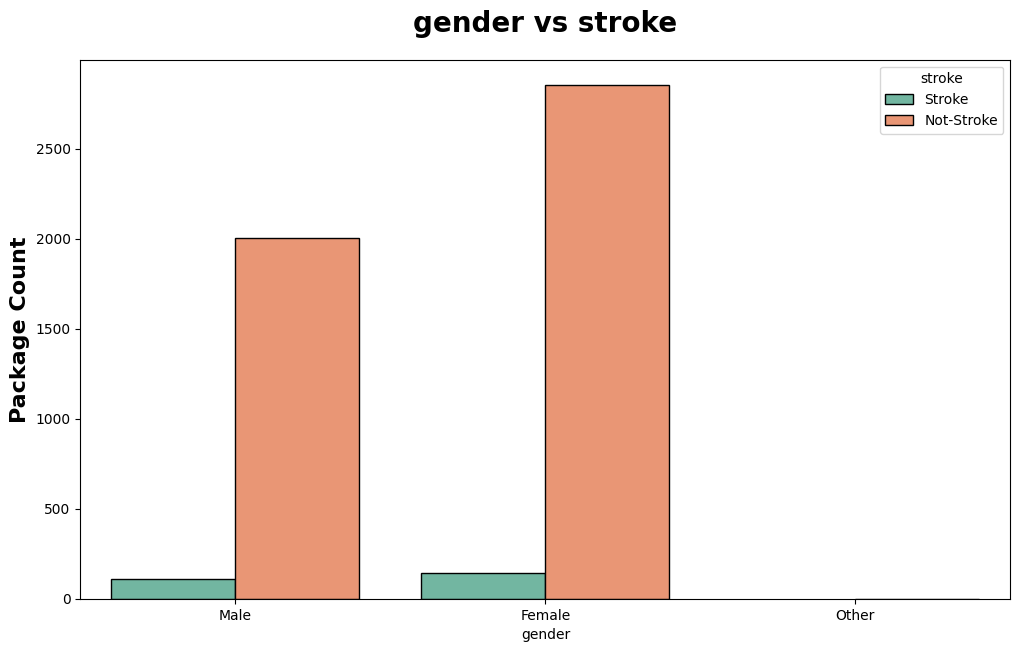

<Figure size 640x480 with 0 Axes>

In [39]:
plt.subplots(figsize=(12, 7))
sns.countplot(x="gender", hue="stroke", data=df1, ec="black", palette="Set2")
plt.title("gender vs stroke", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=16)
plt.show()

# save plot
plt.savefig("images/gender_vs_stroke.png")

**Observations:**

* Both males and females have a significant number of individuals who have not experienced a stroke (represented by the orange bars). The count of females who have not had a stroke is higher than the count of males who have not had a stroke.
* The count of females who have experienced a stroke (represented by the green bars) is slightly higher than the count of males who have experienced a stroke. The number of stroke occurrences is relatively low compared to the non-stroke occurrences for both genders.
* The category "Other" has a negligible count, indicating that there are very few individuals identified as "Other" gender in the dataset.

**Takeaway:**

* Males and females have similar proportions of stroke occurrences relative to their total counts.
* The dataset is highly imbalanced with respect to stroke occurrences across all gender categories.
* The insight we got from Chi2 test was that gender column is not correlated with target variable. This is justified in this plot.

### 4.3 Age category split

In [40]:
bins = [0, 10, 20, 50, 85]
labels = ["Children", "Teens", "Adult", "Senior"]
df2 = df.copy()
df2["age_cat"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
age_group = df2.groupby(["age_cat", "stroke"])["id"].count().reset_index(name="count")
age_group

,age_cat,stroke,count
0,Children,0,471
1,Children,1,1
2,Teens,0,493
3,Teens,1,1
4,Adult,0,1916
5,Adult,1,18
6,Senior,0,1981
7,Senior,1,229


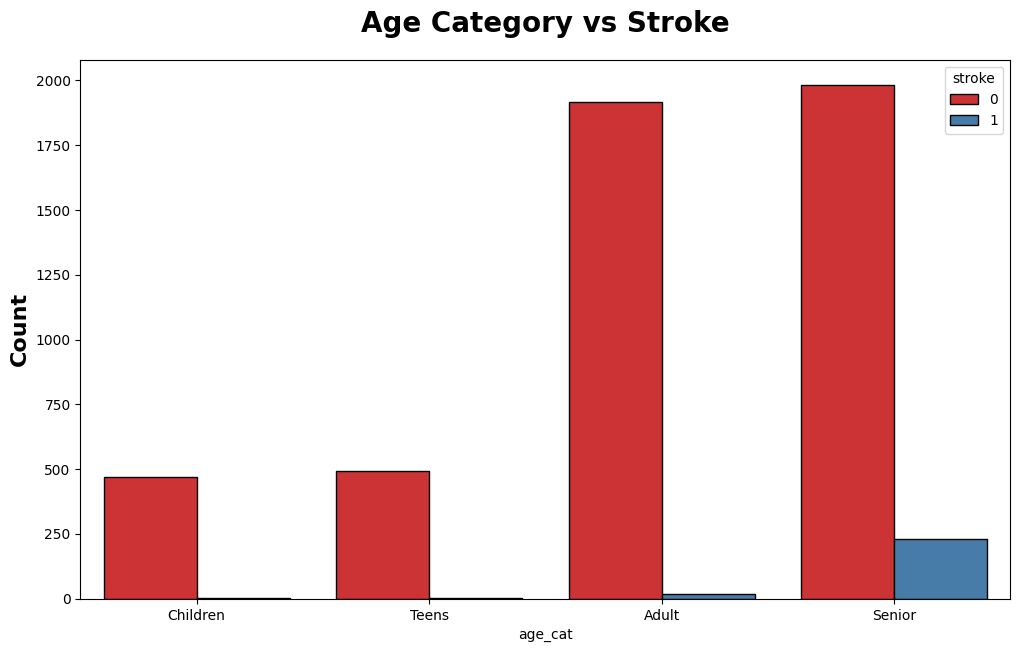

<Figure size 640x480 with 0 Axes>

In [41]:
plt.subplots(figsize=(12, 7))
sns.countplot(x="age_cat", hue="stroke", data=df2, ec="black", palette="Set1")
plt.title("Age Category vs Stroke", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.show()

# save plot
plt.savefig("images/age_cat_split.png")

**Observations:**

* The vast majority of children have not experienced a stroke, with 471 individuals not having a stroke and only 1 individual having a stroke. Stroke occurrences are extremely rare in this age category.
* Similar to the children category, the majority of teens have not experienced a stroke, with 493 individuals not having a stroke and only 1 individual having a stroke. Stroke occurrences are also extremely rare in this age category.
* The adult category has a larger population, with 1916 individuals not having a stroke and 18 individuals having a stroke. While the majority of adults have not experienced a stroke, there are more stroke occurrences compared to the children and teen categories.
* The senior category shows a significant increase in stroke occurrences, with 1981 individuals not having a stroke and 229 individuals having a stroke. Seniors have the highest number of stroke occurrences among all age categories, indicating that age is a significant factor in stroke risk.

**Takeaway:**

* Stroke occurrences are extremely low in children and teens, almost negligible.
* There is a slight increase in stroke occurrences in adults, but it remains relatively low.
* The senior category shows a substantial number of stroke occurrences, highlighting a strong correlation between older age and increased stroke risk.

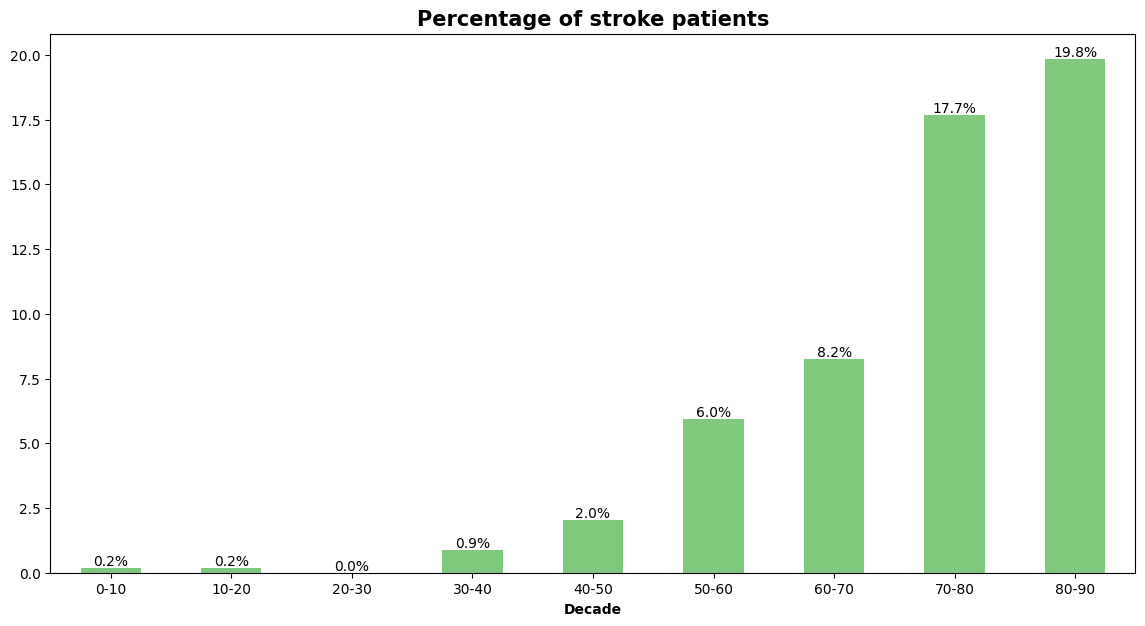

<Figure size 640x480 with 0 Axes>

In [43]:
df2 = df.copy()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]
df2["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

import matplotlib.ticker as mtick

plt.figure(figsize=[14, 7])

(100*df2[df2["stroke"].isin([1])]["age_group"].value_counts()/df2["age_group"].value_counts()).plot(kind="bar",
                                                                                                    stacked=True,
                                                                                                    colormap="Accent")
plt.title("Percentage of stroke patients", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["stroke"].isin([1])]["age_group"].value_counts()/df2["age_group"].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt = "{:0.1f}%".format(count)
    plt.text(n, count+0.1, strt, ha="center")

plt.xlabel("Decade", fontweight="bold")
plt.xticks(rotation=0)
plt.show()

# save plot
plt.savefig("images/percentage_stroke_patients.png")

**Takeaway:**

* As the age increases, there is higher chance of heart stroke.